# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'
datadirectory = gitdir + '/' + 'Data/'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [6]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [7]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [8]:
rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [9]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [10]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (509/509), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 810 (delta 494), reused 499 (delta 491), pack-reused 301
Receiving objects: 100% (810/810), 80.95 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (597/597), completed with 210 local objects.
From https://github.com/reichlab/covid19-forecast-hub
   ad5dbd55..2757707e  master     -> origin/master
 + fede5631...3be7f447 gh-pages   -> origin/gh-pages  (forced update)
   655735a3..3472f131  issue-1666 -> origin/issue-1666
 * [new branch]        issue-1669 -> origin/issue-1669
Updating ad5dbd55..2757707e
Updating files: 100% (447/447), done.
Fast-forward
 README.md                                          |      1 +
 code/notebooks/remove_nohash_from_zoltar.ipynb     |    374 +
 code/reports/2020-11-24-weekly-report.html         |   4255 +
 code/validation/locally_validated_files.csv        |     57 +
 code/validation/validated_files.csv      

In [11]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [12]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, datadirectory)

In [14]:
# os.chdir(mypwd[0])

# files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
# for file in files:
#     if os.path.isfile(file):
#         shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(datadirectory)        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

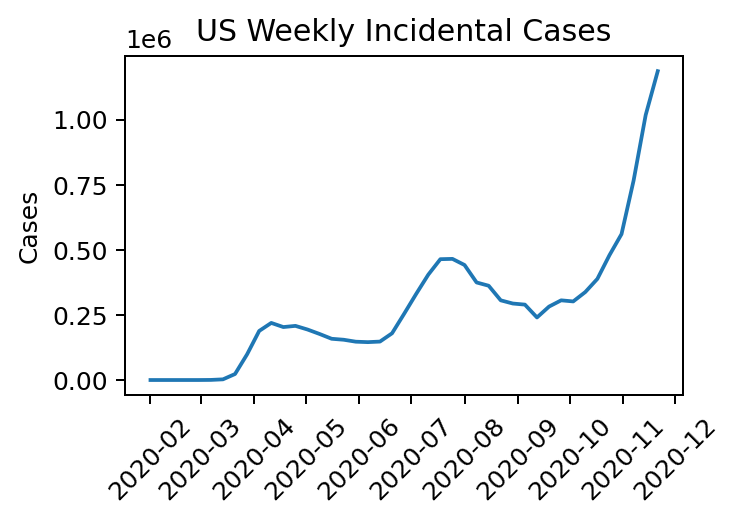

In [15]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [16]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')
FirstForecasts.to_pickle('../Data/ModelsANDForecasts.pkl')

100%|██████████| 2877/2877 [07:55<00:00,  6.05it/s]


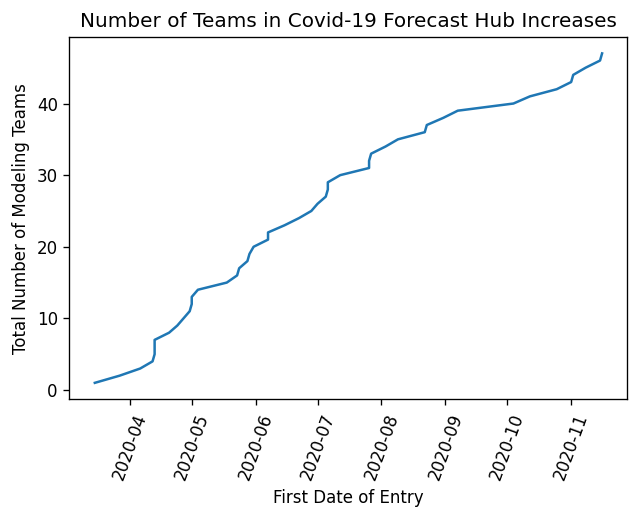

In [17]:
FirstForecasts = pd.read_pickle('../Data/ModelsANDForecasts.pkl')
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
5.100556999891981
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. UCLA:SuEIR
3. Covid19Sim:Simulator
4. JHU_IDD:CovidSP
5. IowaStateLW:STEM
6. OliverWyman:Navigator
7. Columbia_UNC:SurvCon
8. CovidAnalytics:DELPHI
9. UMich:RidgeTfReg
10. USACE:ERDC_SEIR
11. RobertWalraven:ESG
12. QJHong:Encounter
13. LNQ:ens1
14. IHME:CurveFit
15. COVIDhub:ensemble
16. Karlen:pypm
17. DDS:NBDS
18. CU:nochange
19. CU:scenario_high
20. CU:scenario_low
21. CU:select
22. CU:scenario_mid
23. CEID:Walk
24. JHUAPL:Bucky
25. BPagano:RtDriven
26. JHU_CSSE:DECOM
27. USC:SI_kJalpha_RF
28. JCB:PRM
29. UChicagoCHATTOPADHYAY:UnIT
30. UCF:AEM
31. USC:SI_kJalpha
32. UVA:Ensemble
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


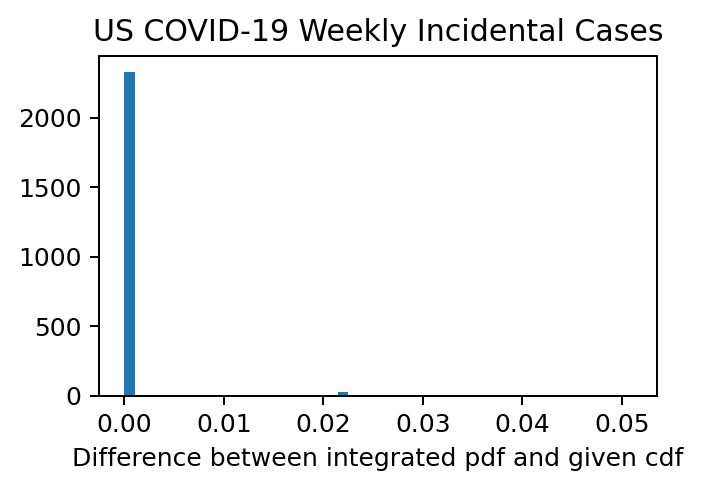

In [18]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [19]:
ScoreboardCases[ScoreboardCases['deltaW']==1]

,model,forecast_date,delta,target_end_date,quantile,value,cases,deltaW,proper,score,sumpdf,prange,p,CIHI,CILO,PE,scorecontr
7,COVIDhub:baseline,2020-04-06,5,2020-04-11,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[103685.875, 151268.4, 187138.0, 187367.0, 187...",219350.0,1.0,True,-11.610664,0.950000,0.95,0.000002,2.710481e+05,1.036859e+05,1.873670e+05,332.065480
13,COVIDhub:baseline,2020-04-13,5,2020-04-18,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[134816.225, 183111.8, 216763.5, 217543.0, 218...",203462.0,1.0,True,-9.700484,0.950000,0.95,0.000004,3.002698e+05,1.348162e+05,2.175430e+05,127.771279
22,COVIDhub:baseline,2020-04-20,5,2020-04-25,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[124010.4, 176626.8, 204068.5, 205801.0, 20753...",207990.0,1.0,True,-7.272304,0.950000,0.95,0.000014,2.875916e+05,1.240104e+05,2.058010e+05,37.945544
27,COVIDhub:baseline,2020-04-27,5,2020-05-02,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[129429.475, 182698.2, 206380.25, 210195.0, 21...",193994.0,1.0,True,-9.397033,0.950000,0.95,0.000005,2.909605e+05,1.294295e+05,2.101950e+05,109.784183
33,COVIDhub:baseline,2020-05-04,5,2020-05-09,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[114548.125, 168931.0, 187358.75, 194385.0, 20...",176871.0,1.0,True,-8.796626,0.950000,0.95,0.000007,2.742219e+05,1.145481e+05,1.943850e+05,81.313574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,COVIDhub:baseline,2020-11-16,5,2020-11-21,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[927220.7, 945055.1, 997810.25, 1017810.0, 103...",1186501.0,1.0,True,NaN,0.949991,0.95,0.000000,1.108399e+06,9.272207e+05,1.017810e+06,NaN
2413,JHUAPL:Bucky,2020-11-16,5,2020-11-21,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[983153.137563289, 1057392.9119104, 1122868.10...",1186501.0,1.0,True,-8.391619,0.949999,0.95,0.000003,1.435657e+06,9.831531e+05,1.201568e+06,66.407482
2414,COVIDhub:ensemble,2020-11-16,5,2020-11-21,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[909903.0, 979407.0, 1036743.0, 1136360.0, 124...",1186501.0,1.0,True,-9.422158,0.950000,0.95,0.000002,1.360583e+06,9.099030e+05,1.136360e+06,111.172040
2415,DDS:NBDS,2020-11-16,5,2020-11-21,"[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]","[1030257.0, 1123706.0, 1219104.0, 1346923.0, 1...",1186501.0,1.0,True,-9.699043,0.950000,0.95,0.000002,2.108617e+06,1.030257e+06,1.346923e+06,127.679280


In [20]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [21]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [22]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)
ScoreboardCases.reset_index(drop=True,inplace=True)

<Figure size 1800x1200 with 0 Axes>

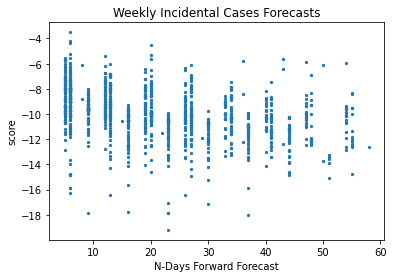

<Figure size 1800x1200 with 0 Axes>

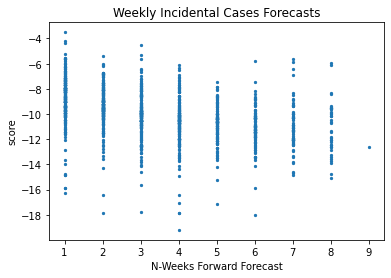

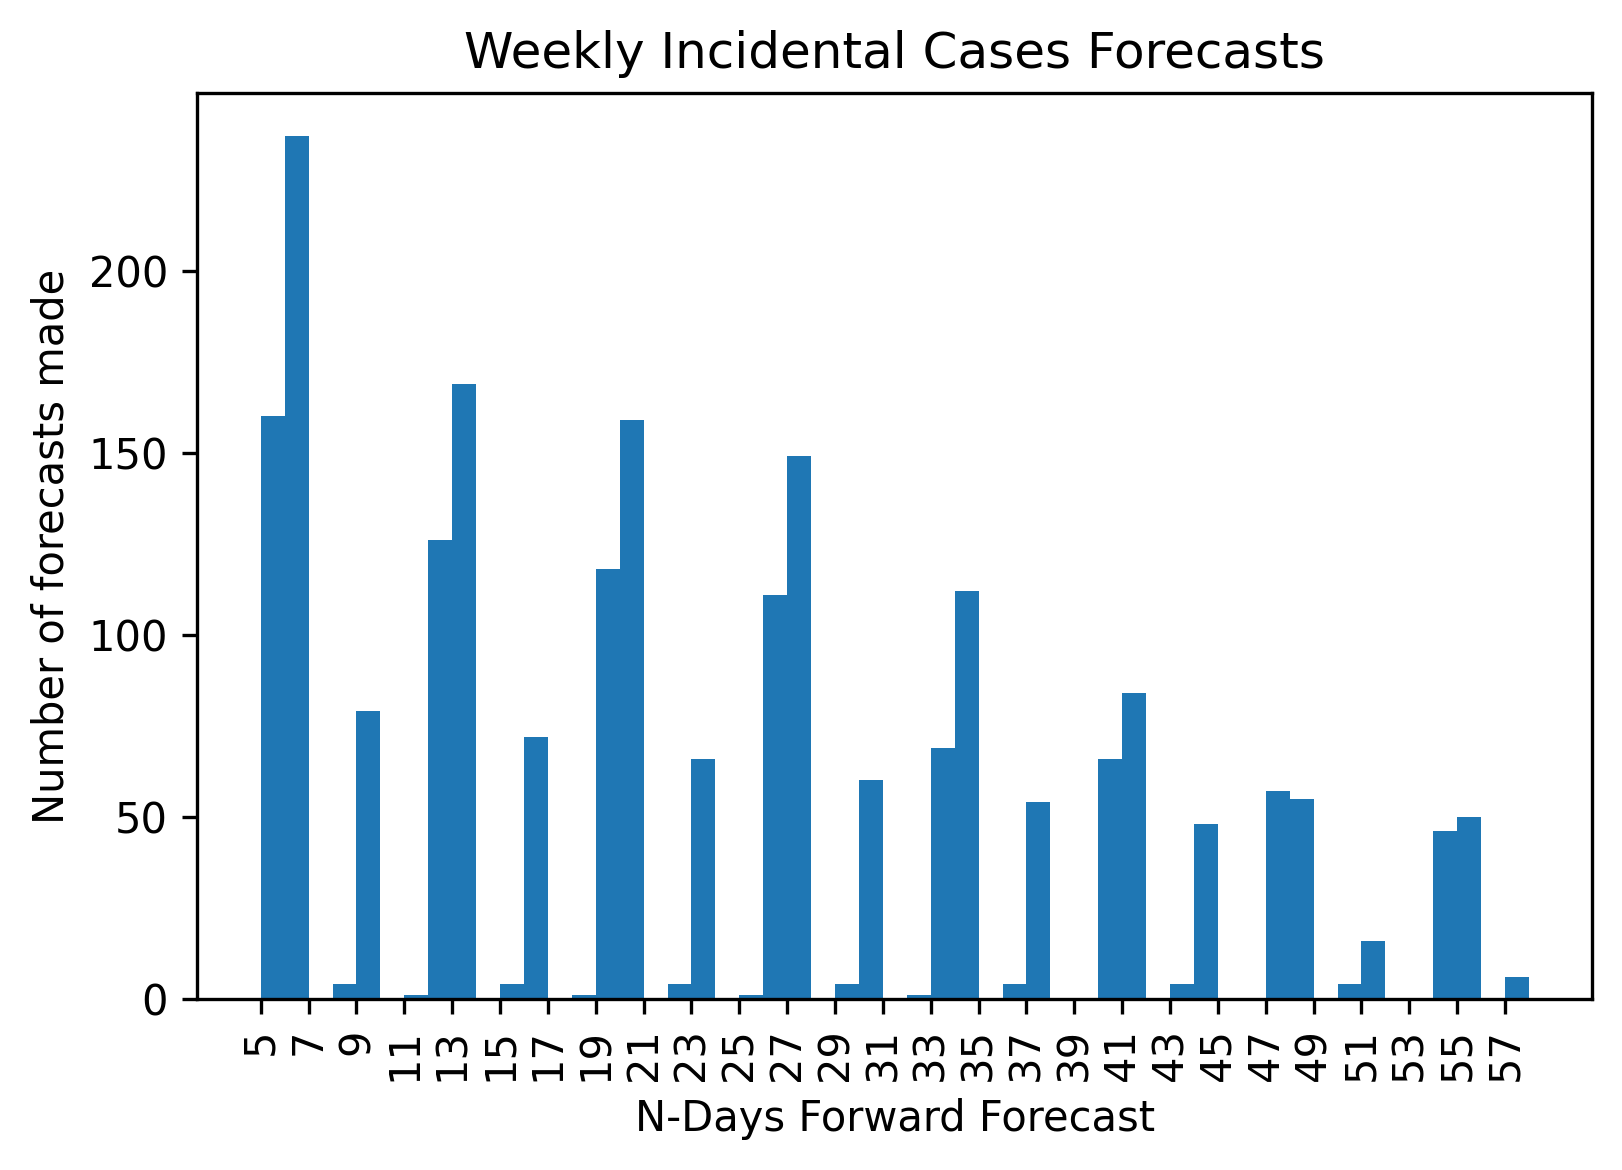

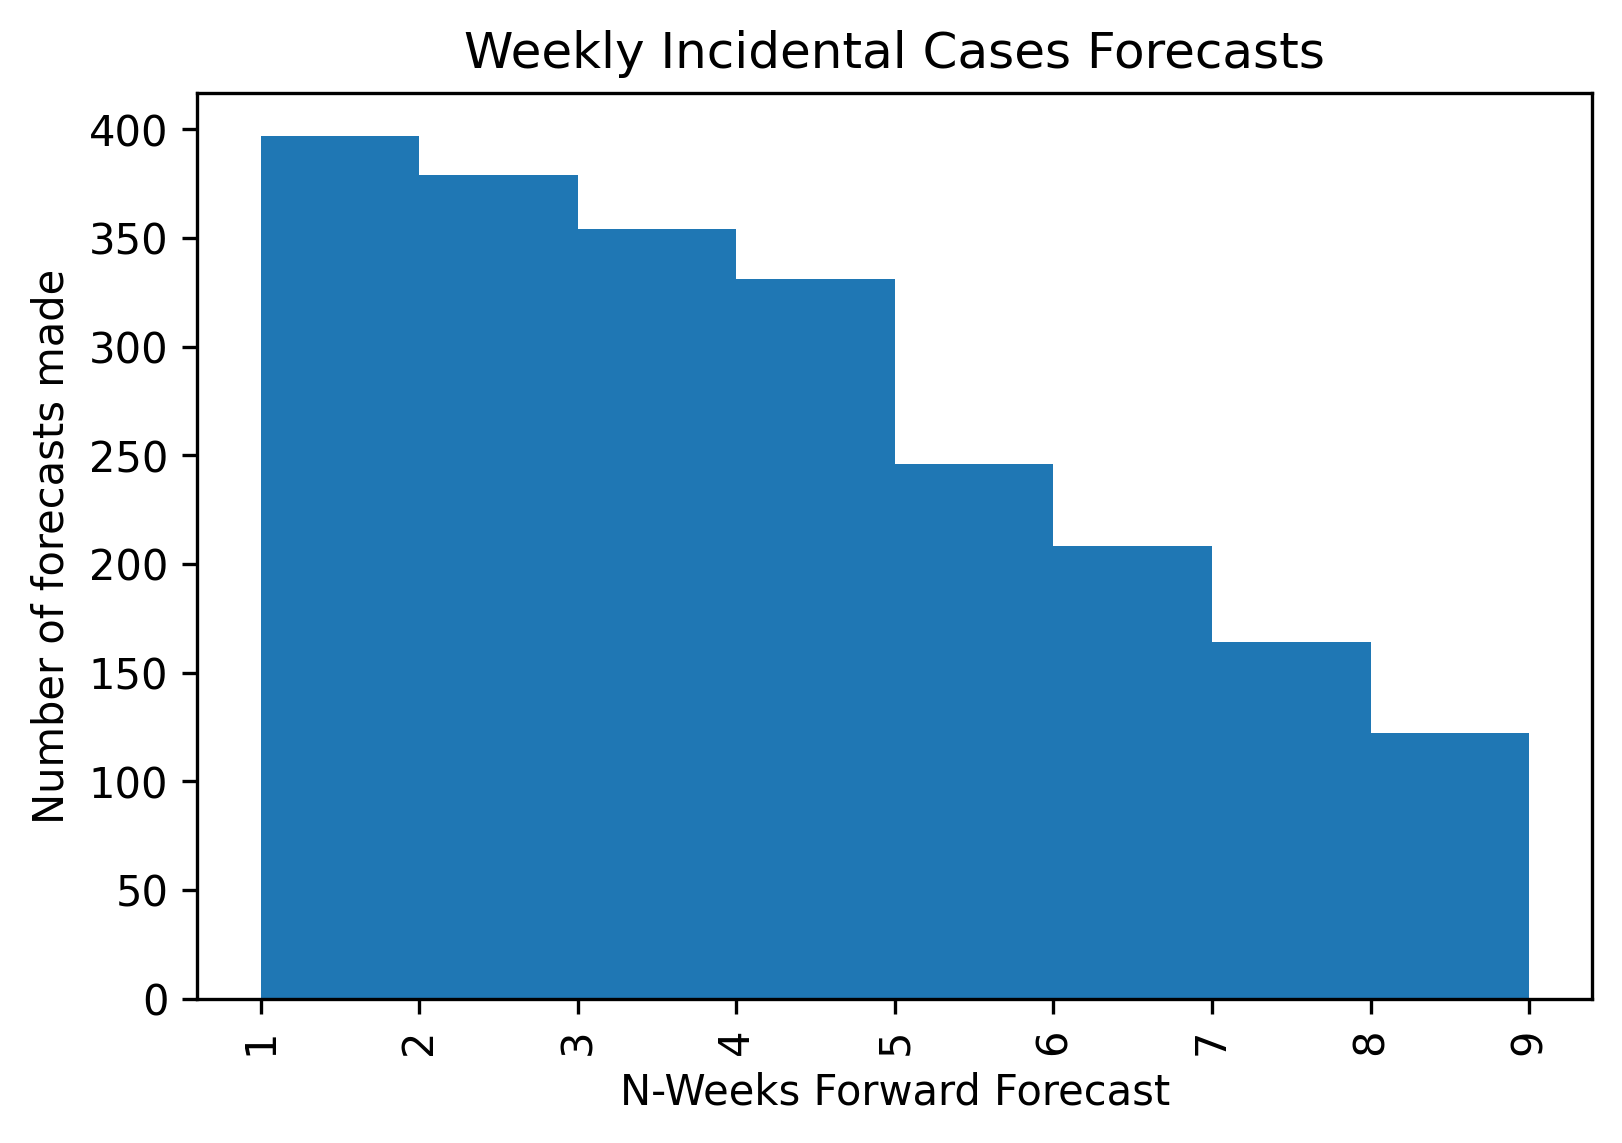

In [23]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [24]:
int(ScoreboardCases['deltaW'].max())

9

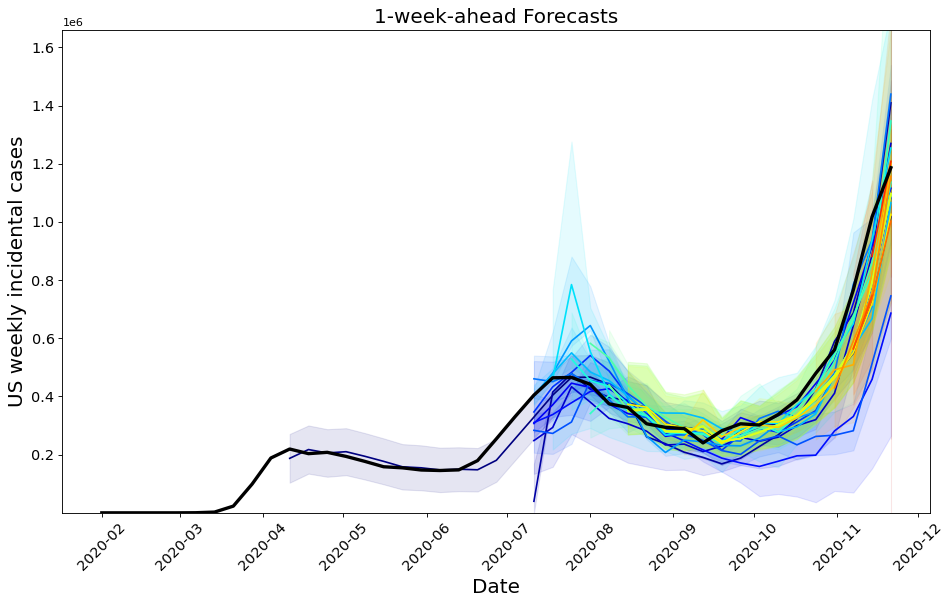

In [25]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

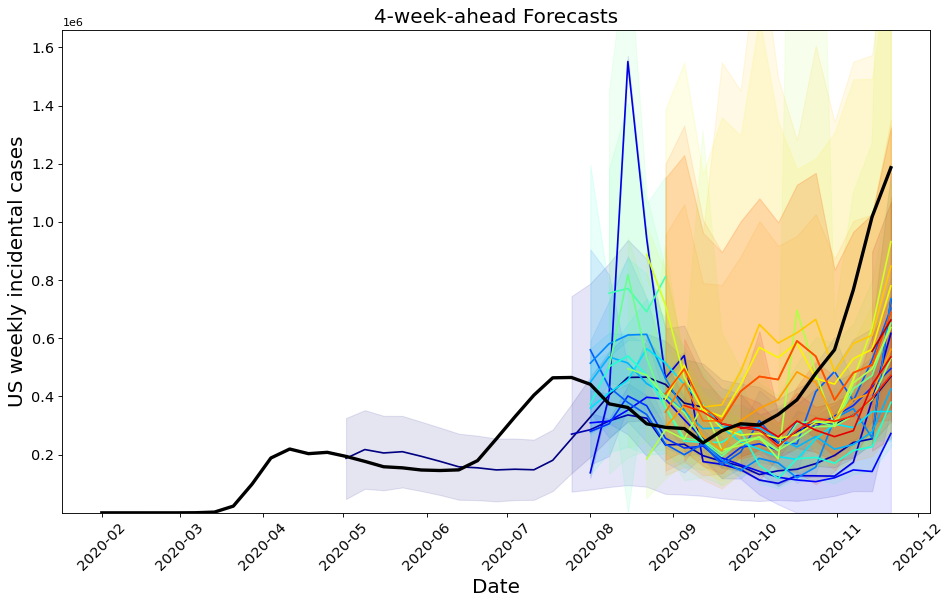

In [26]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [27]:
#ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven']

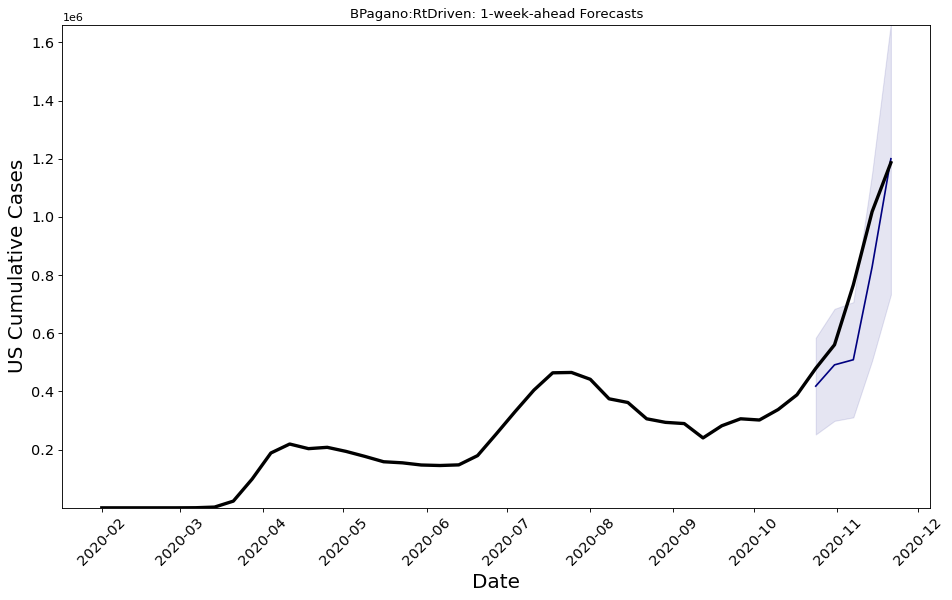

In [28]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven')

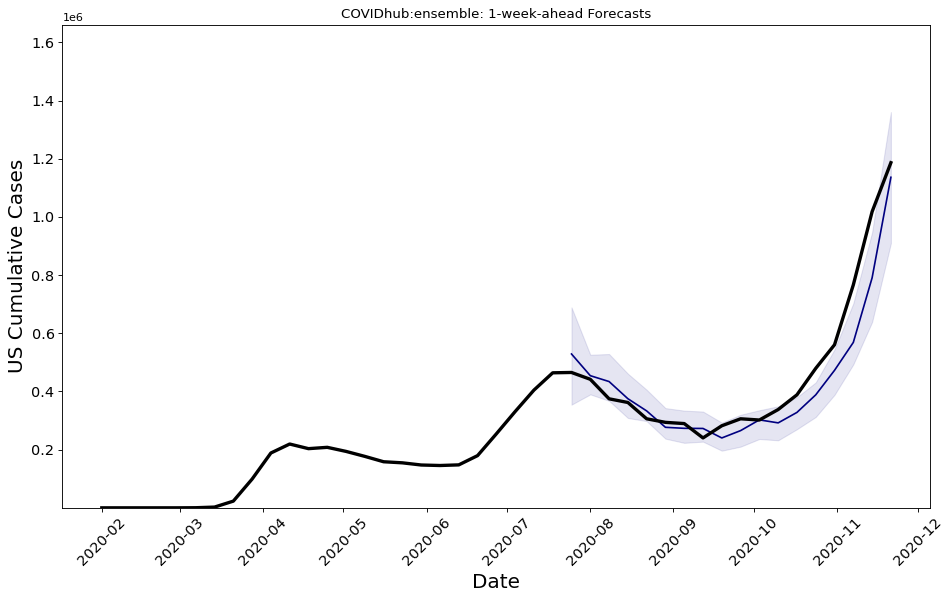

In [29]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble')

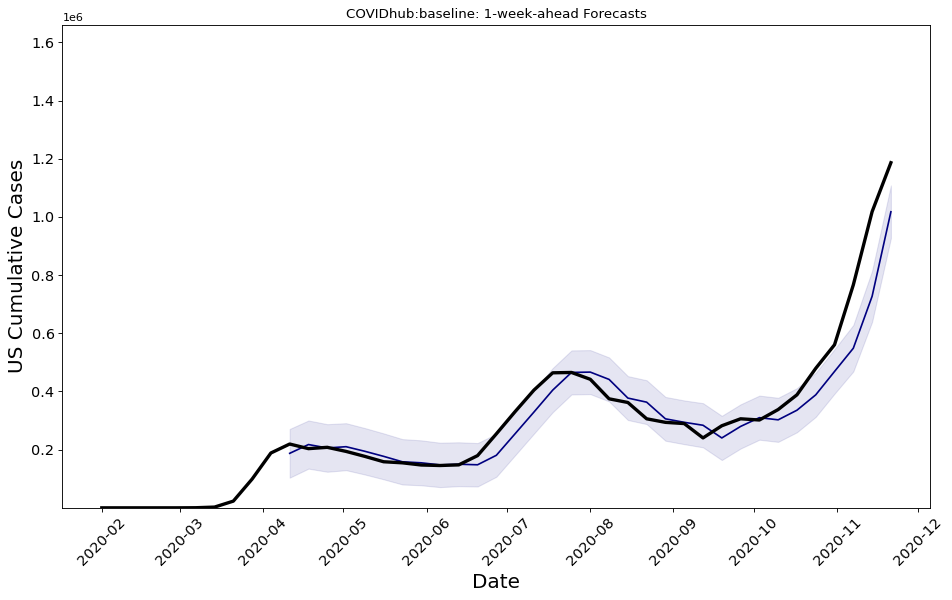

In [30]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline')

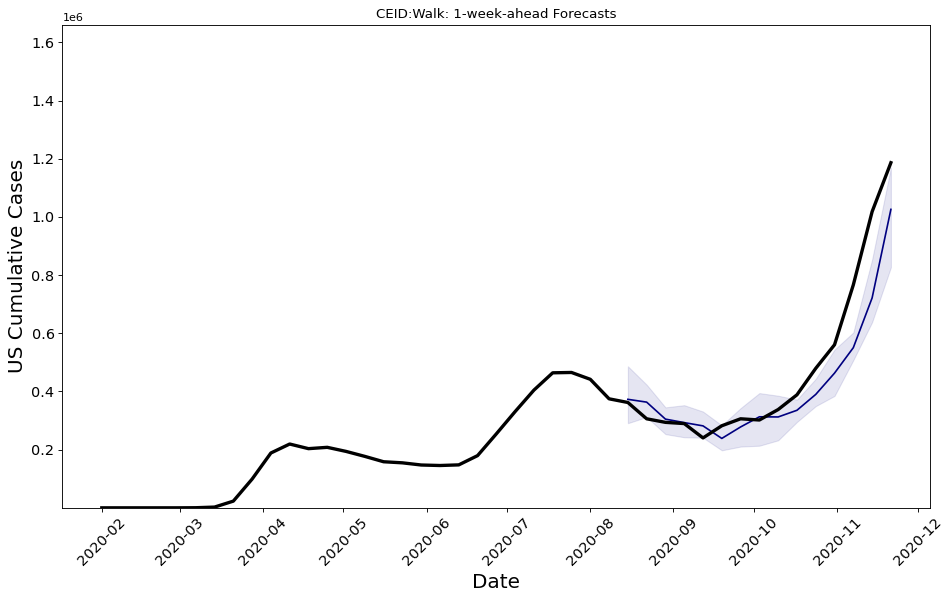

In [31]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

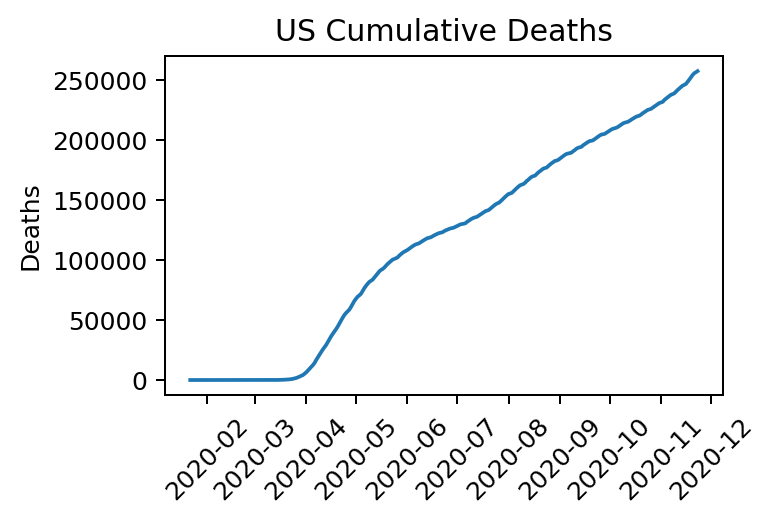

In [32]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [ ]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

 69%|██████▊   | 5387/7838 [02:41<00:34, 71.13it/s]  

In [ ]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)

In [ ]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# Data Set Summary

In [ ]:
#Number of Unique Case Forecasting Models in the data set 
len(ScoreboardCases['model'].unique())

In [ ]:
#Number of Unique Cumulative Death Forecasting Models in the data set 
len(ScoreboardDeaths['model'].unique())

# Get weighted and unweighted model forecasts

In [ ]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

# UNWEIGHTED FORECASTING

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight')

In [ ]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7)

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight')

In [ ]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7)

# SCORE-WEIGHTED FORECASTING

## Deaths

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight')

## Cases

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight')

# ANALYSIS OF SCORES

## Plots by date forecast made

In [ ]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

In [ ]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

In [ ]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

In [ ]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])